# 1.) Preprocess your data into scaled input variables and an output variable


In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ 441B/CLV.csv")


In [ ]:
df.head()

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1


In [ ]:
df.columns

Index(['Unnamed: 0', 'Customer Lifetime Value', 'Income', 'Number of Policies',
       'Total Claim Amount', 'Months Since Last Claim', 'Vehicle Size_Large',
       'Vehicle Size_Medsize', 'Gender_M', 'EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
       'EmploymentStatus_Unemployed', 'Policy Type_Corporate Auto',
       'Policy Type_Personal Auto', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single'],
      dtype='object')

In [ ]:
df_select = df[["Income", "Total Claim Amount", "Months Since Last Claim", "EmploymentStatus_Employed", "Customer Lifetime Value"]]
df_select.head()

,Income,Total Claim Amount,Months Since Last Claim,EmploymentStatus_Employed,Customer Lifetime Value
0,56274,384.811147,32,1,2763.519279
1,0,1131.464935,13,0,6979.535903
2,48767,566.472247,18,1,12887.431650
3,0,529.881344,18,0,7645.861827
4,43836,138.130879,12,1,2813.692575


In [ ]:
X = df_select.drop(["Customer Lifetime Value"], axis=1)
y = df["Customer Lifetime Value"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

In [ ]:
clf = MLPRegressor()
params = {'hidden_layer_sizes': [(10,), (20,5,)],
          'activation':['relu', 'logistic'],
          'alpha': [0.0001, 0.001, 0.01]}

grid = GridSearchCV(clf, params, cv=10)
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=10, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(10,), (20, 5)]})

In [ ]:
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 5)}
Best score: 0.055962603700556904


# 3.) Train a model with the optimal solution from GridSearch

In [ ]:
model = MLPRegressor(**grid.best_params_)
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(20, 5))

# 4.) What are the in-sample and out of sample MSEs

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("In-sample MSE: ", mse_train)
print("Out-of-sample MSE: ", mse_test)

In-sample MSE:  43572062.95378393
Out-of-sample MSE:  46658188.95576304


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [ ]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [ ]:
model.compile(loss='mse', optimizer=Adam(lr=0.01))
model.fit(X_train, y_train, batch_size=32, epochs=100)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 109866120.0000
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 109866104.0000
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 109866160.0000
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 109866144.0000
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 109866160.0000
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 109866128.0000
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 109866120.0000
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 109866104.0000
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 109866144.0000
Epoch 10/100
200/200 [==============================] - 0s 1ms/step - loss: 109866128.0000
Epoch 11/100
200/200 [==============================] - 0s 2ms/step - loss: 109866104.0000
Epoch 12

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [ ]:
from tensorflow.keras.utils import plot_model

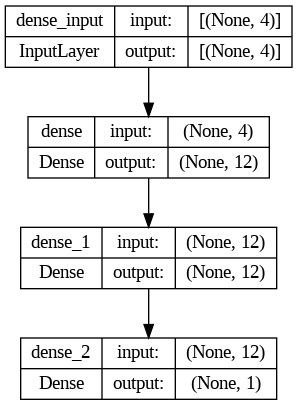

In [ ]:
plot_model(model, show_shapes = True)

In [ ]:
from ann_visualizer.visualize import ann_viz
ann_viz(model, title='CVN NN Viz', filename='model_viz.html')